**Importing Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import statsmodels.api as sm

**Taking Data from a csvc & Spliting data into 2 equal-sized parts**

In [2]:
data_f = pd.read_csv("housing data.csv")
df_split = np.array_split(data_f, 2)

In [3]:
train = df_split[0]
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal   208500.0  
1         5   2007        WD         Normal   181500.0  
2         9   2008        WD         Normal   223500.0  
3         2   2006        WD        Abnorml   140000.0  
4        12   2008        WD         Normal   250000.0  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal   175000.0  
1456      2   2010        WD         Normal   210000.0  
1457      5   2010        WD         Normal   266500.0  
1458      4   2010        WD         Normal   142125.0  
1459      6   2008        WD         Normal   147500.0  

[1460 rows x 81 columns]

In [4]:
test = df_split[1]
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1460  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1461  1462          20       RL         81.0    14267   Pave   NaN      IR1   
1462  1463          60       RL         74.0    13830   Pave   NaN      IR1   
1463  1464          60       RL         78.0     9978   Pave   NaN      IR1   
1464  1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   NaN      Reg   
2915  2916         160       RM         21.0     1894   Pave   NaN      Reg   
2916  2917          20       RL        160.0    20000   Pave   NaN      Reg   
2917  2918          85       RL         62.0    10441   Pave   NaN      Reg   
2918  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1460         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1461         Lvl    AllPub  ...        0    NaN    NaN        Gar2   12500   
1462         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1463         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1464         HLS    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
2914         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2915         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2916         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2917         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
2918         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1460      6   2010        WD         Normal        NaN  
1461      6   2010        WD         Normal        NaN  
1462      3   2010        WD         Normal        NaN  
1463      6   2010        WD         Normal        NaN  
1464      1   2010        WD         Normal        NaN  
...     ...    ...       ...            ...        ...  
2914      6   2006        WD         Normal        NaN  
2915      4   2006        WD        Abnorml        NaN  
2916      9   2006        WD        Abnorml        NaN  
2917      7   2006        WD         Normal        NaN  
2918     11   2006        WD         Normal        NaN  

[1459 rows x 81 columns]

In [5]:
train["SalePrice"].isnull().sum().sum()

0

**Handling missing values in the train dataset.**

In [6]:
train.isnull().sum().sum()

6965

In [7]:
train.isnull().count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1460
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [8]:
total = train.isnull().sum().sort_values(ascending=False)
total.head(30)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
TotRmsAbvGrd       0
GarageCars         0
dtype: int64

In [9]:
missed = train.isna().sum()

In [10]:
missed
missed = missed[abs(missed)>200]

**Calculating missing values and filter columns with more than 200 missing entries.**

<AxesSubplot:>

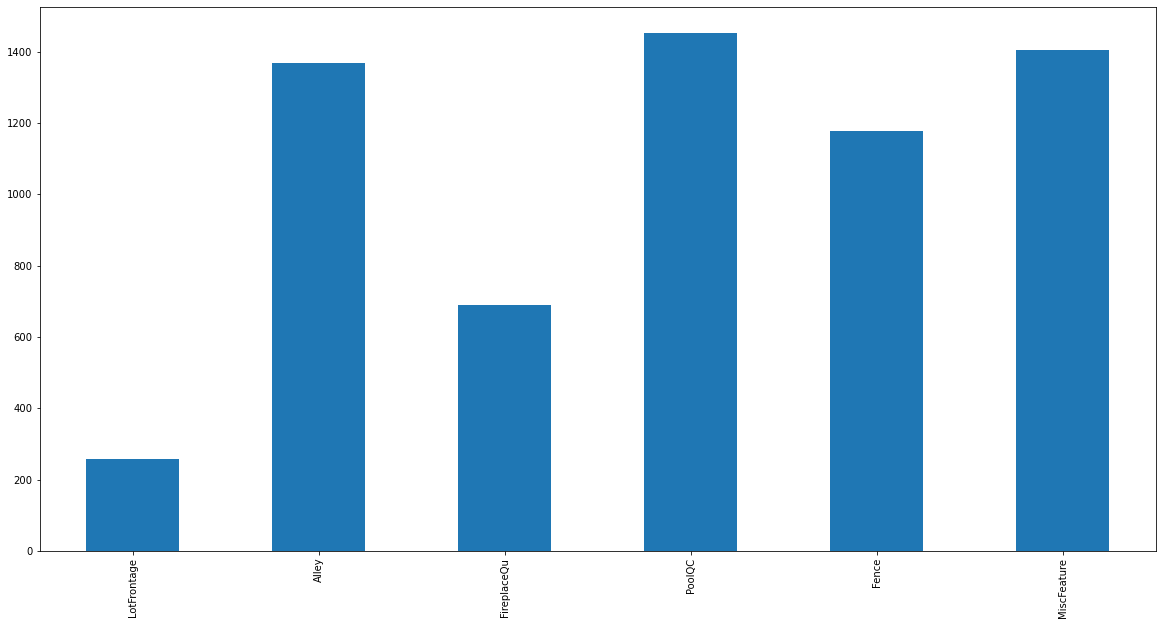

In [11]:
missed.plot(kind = "bar",figsize=(20,10))# sns.barplot(x=data_f.columns)

**Drop columns with more than 200 missing values from train.**

In [12]:
train.drop(missed.index,axis=1,inplace = True)

<AxesSubplot:>

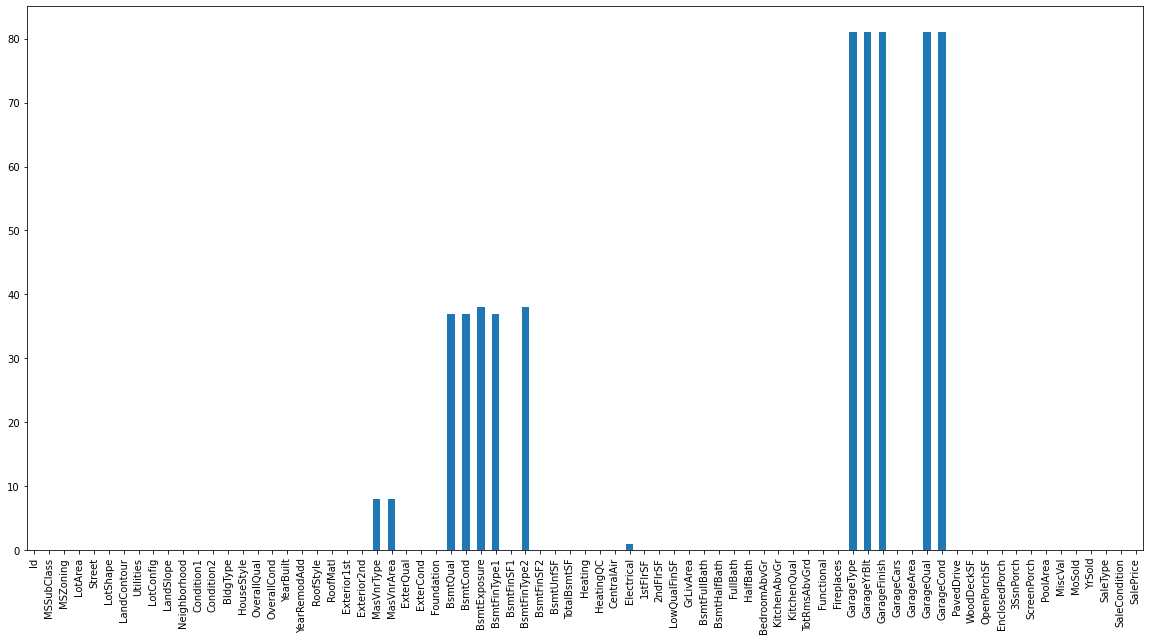

In [13]:
missed = train.isna().sum()
missed.plot(kind = "bar",figsize=(20,10))# sns.barplot(x=data_f.columns)

In [14]:
train.isna().sum().sum()

609

In [15]:
mode = train["Electrical"].mode()
mode

0    SBrkr
Name: Electrical, dtype: object

**Fill missing values in "Electrical" column with mode and check if any NaN remains.**

In [16]:
train["Electrical"] = train["Electrical"].fillna(mode)[0]
train["Electrical"].isna().sum()

0

In [17]:
train["Electrical"]

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    SBrkr
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object

In [18]:
train["Electrical"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: Electrical
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [19]:
total = train.isnull().sum().sort_values(ascending=False)
total.head(15)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
MasVnrArea       8
HalfBath         0
FullBath         0
BedroomAbvGr     0
dtype: int64

In [20]:
missing = train.isna().sum()
missing = missing[abs(missing)>20]
missing

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [21]:
train.drop(missing.index,axis=1,inplace = True)

**Drop columns with missing values, then visualize remaining missing values with a bar plot.**

<AxesSubplot:>

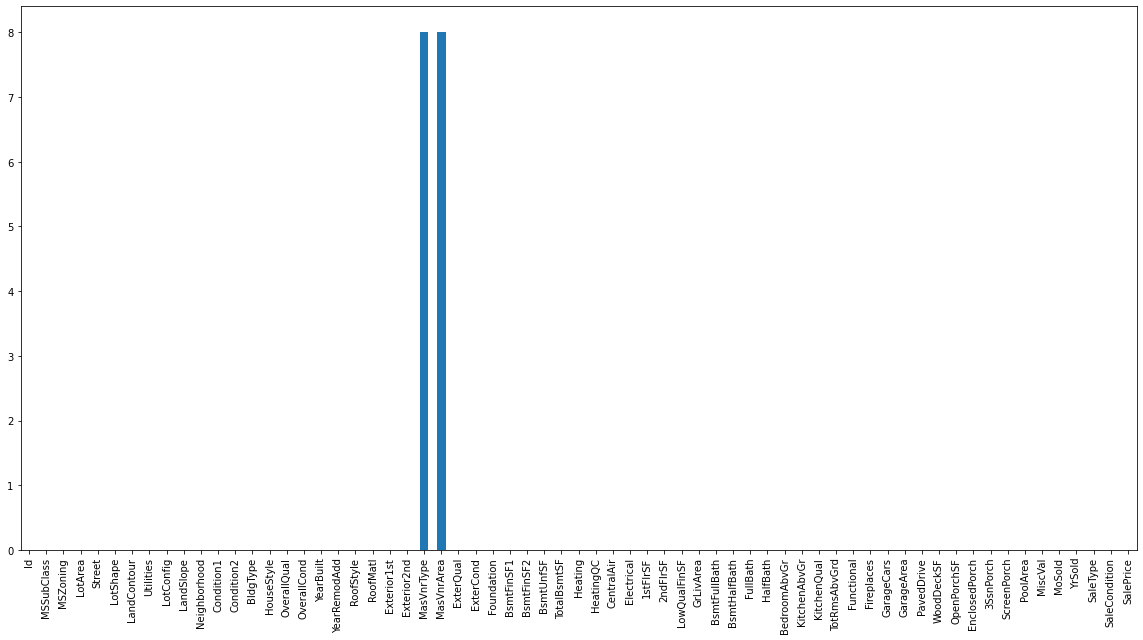

In [22]:
missed = train.isna().sum()
missed.plot(kind = "bar",figsize=(20,10))# sns.barplot(x=data_f.columns)

In [23]:
mean = train["MasVnrArea"].mean()
mean

103.68526170798899

**Replacing missing values in "MasVnrArea" with mean, check if any NaN left.**

In [24]:
train["MasVnrArea"].fillna(mean,inplace=True)
train["MasVnrArea"].isna().sum()

0

<AxesSubplot:>

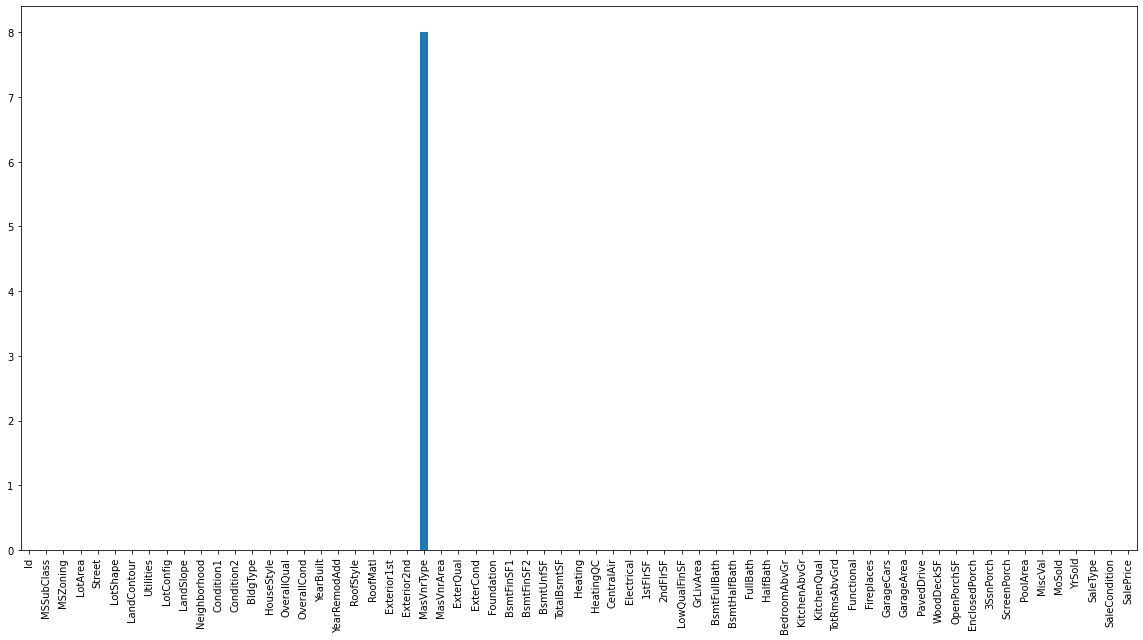

In [25]:
missed = train.isna().sum()
missed.plot(kind = "bar",figsize=(20,10))# sns.barplot(x=data_f.columns)

**Removing "MasVnrType" column from the train dataset.**

In [26]:
train.drop("MasVnrType", axis = 1,inplace=True)

In [27]:
train.isna().sum().sum()

0

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

**Train data is now cleaned and ready for use. Next, cleaning the test data.**

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 1460 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  Overa

In [30]:
test.isna().count()

Id               1459
MSSubClass       1459
MSZoning         1459
LotFrontage      1459
LotArea          1459
                 ... 
MoSold           1459
YrSold           1459
SaleType         1459
SaleCondition    1459
SalePrice        1459
Length: 81, dtype: int64

**Column requires 1459 total values.**

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 1460 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  Overa

<AxesSubplot:>

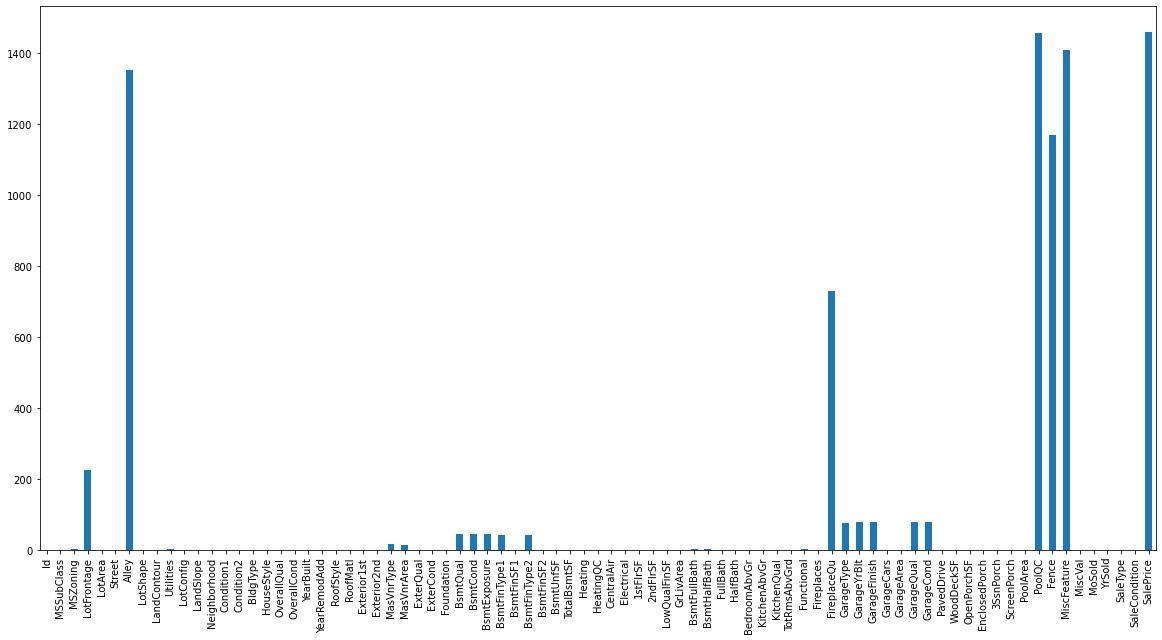

In [32]:
missed_test = test.isna().sum()
missed_test.plot(kind="bar",figsize = (20,10))

**Apply logic for missing values in test: 
drop cols with >200, keep GarageArea and GarageType for Garage, same for Basement.**

In [33]:
missing = test.isna().sum()
missing = missing[abs(missing)>200]
test.drop(missing.index,axis=1,inplace=True)

In [34]:
test.isna().sum().sum()

658

<AxesSubplot:>

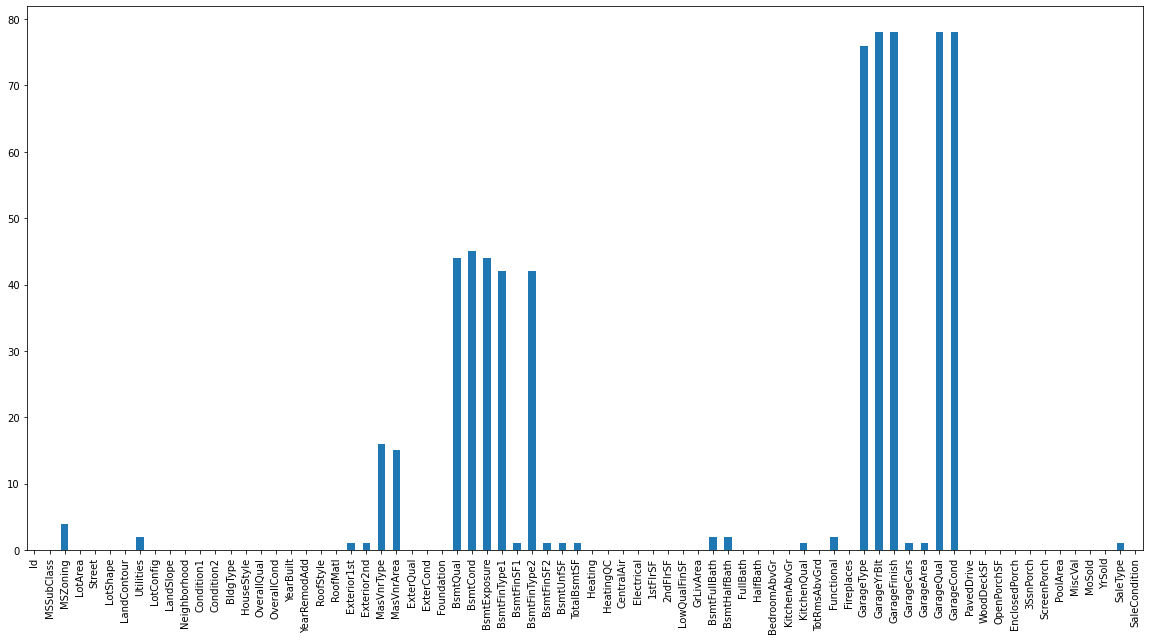

In [35]:
missed_test = test.isna().sum()
missed_test.plot(kind="bar",figsize = (20,10))

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [37]:
missing=test.isna().sum()
missing = missing[abs(missing)>20]
test.drop(missing.index,axis=1,inplace=True)

<AxesSubplot:>

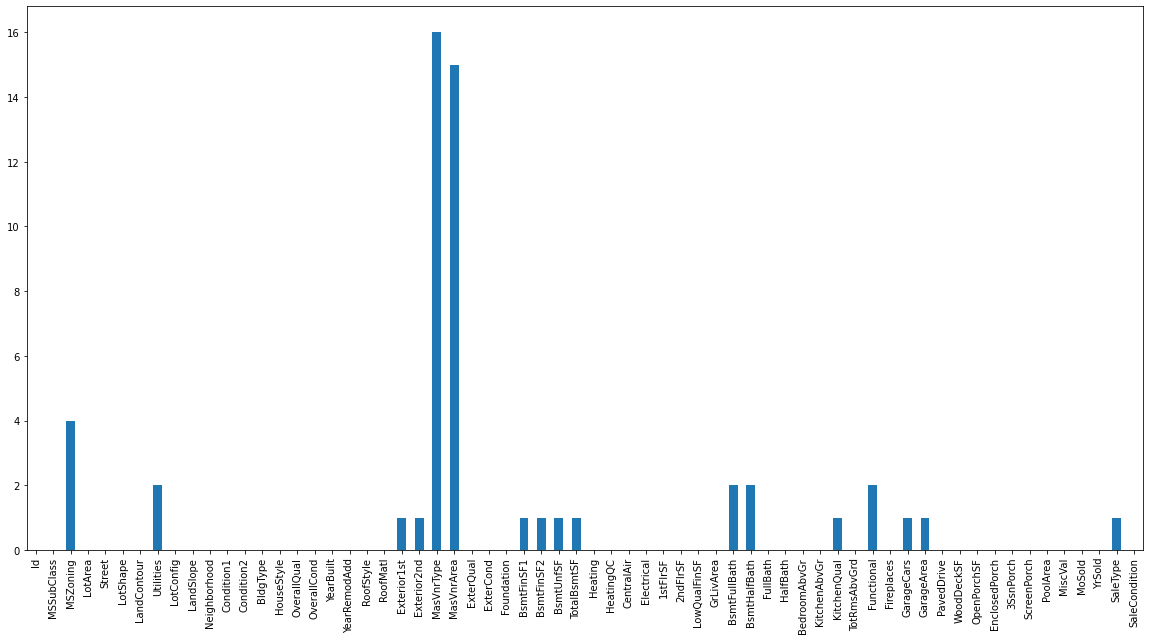

In [38]:
missed_test = test.isna().sum()
missed_test.plot(kind="bar",figsize = (20,10))

In [39]:
test.drop("MasVnrType",axis=1,inplace=True)

In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 1460 to 2918
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearR

In [41]:
mean = train["MasVnrArea"].mean()
mean
test["MasVnrArea"].fillna(mean,inplace=True)
test["MasVnrArea"].isna().sum()

0

In [42]:
missing = test.isnull().sum()
missing = missing[abs(missing)>0]
missing

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [43]:
for feature in missing.index:
    test[feature] = test[feature].fillna(test[feature].mode()[0])

In [44]:
test.isna().sum().sum()

0

In [45]:
np.shape(train),np.shape(test)

((1460, 64), (1459, 63))

**Test data is now clean**

**Proceeding with further steps.**

In [46]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

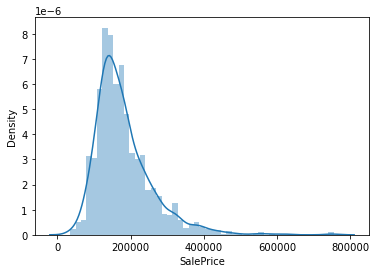

In [47]:
sns.distplot(train["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

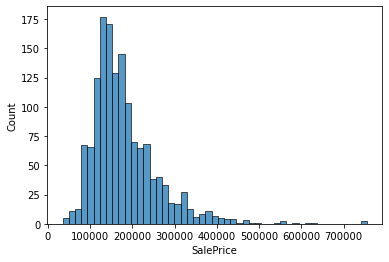

In [48]:
sns.histplot(train["SalePrice"])

**Calculating the correlation matrix for the train dataset.**

In [49]:
corrmat = train.corr()
corrmat

Id  MSSubClass   LotArea  OverallQual  OverallCond  \
Id             1.000000    0.011156 -0.033226    -0.028365     0.012609   
MSSubClass     0.011156    1.000000 -0.139781     0.032628    -0.059316   
LotArea       -0.033226   -0.139781  1.000000     0.105806    -0.005636   
OverallQual   -0.028365    0.032628  0.105806     1.000000    -0.091932   
OverallCond    0.012609   -0.059316 -0.005636    -0.091932     1.000000   
YearBuilt     -0.012713    0.027850  0.014228     0.572323    -0.375983   
YearRemodAdd  -0.021998    0.040581  0.013788     0.550684     0.073741   
MasVnrArea    -0.050199    0.022895  0.103960     0.410238    -0.127788   
BsmtFinSF1    -0.005024   -0.069836  0.214103     0.239666    -0.046231   
BsmtFinSF2    -0.005968   -0.065649  0.111170    -0.059119     0.040229   
BsmtUnfSF     -0.007940   -0.140759 -0.002618     0.308159    -0.136841   
TotalBsmtSF   -0.015415   -0.238518  0.260833     0.537808    -0.171098   
1stFlrSF       0.010496   -0.251758  0.299475     0.476224    -0.144203   
2ndFlrSF       0.005590    0.307886  0.050986     0.295493     0.028942   
LowQualFinSF  -0.044230    0.046474  0.004779    -0.030429     0.025494   
GrLivArea      0.008273    0.074853  0.263116     0.593007    -0.079686   
BsmtFullBath   0.002289    0.003491  0.158155     0.111098    -0.054942   
BsmtHalfBath  -0.020155   -0.002333  0.048046    -0.040150     0.117821   
FullBath       0.005587    0.131608  0.126031     0.550600    -0.194149   
HalfBath       0.006784    0.177354  0.014259     0.273458    -0.060769   
BedroomAbvGr   0.037719   -0.023438  0.119690     0.101676     0.012980   
KitchenAbvGr   0.002951    0.281721 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd   0.027239    0.040380  0.190015     0.427452    -0.057583   
Fireplaces    -0.019772   -0.045569  0.271364     0.396765    -0.023820   
GarageCars     0.016570   -0.040110  0.154871     0.600671    -0.185758   
GarageArea     0.017634   -0.098672  0.180403     0.562022    -0.151521   
WoodDeckSF    -0.029643   -0.012579  0.171698     0.238923    -0.003334   
OpenPorchSF   -0.000477   -0.006100  0.084774     0.308819    -0.032589   
EnclosedPorch  0.002889   -0.012037 -0.018340    -0.113937     0.070356   
3SsnPorch     -0.046635   -0.043825  0.020423     0.030371     0.025504   
ScreenPorch    0.001330   -0.026030  0.043160     0.064886     0.054811   
PoolArea       0.057044    0.008283  0.077672     0.065166    -0.001985   
MiscVal       -0.006242   -0.007683  0.038068    -0.031406     0.068777   
MoSold         0.021172   -0.013585  0.001205     0.070815    -0.003511   
YrSold         0.000712   -0.021407 -0.014261    -0.027347     0.043950   
SalePrice     -0.021917   -0.084284  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
Id             -0.012713     -0.021998   -0.050199   -0.005024   -0.005968   
MSSubClass      0.027850      0.040581    0.022895   -0.069836   -0.065649   
LotArea         0.014228      0.013788    0.103960    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.410238    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.127788   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.314745    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179186    0.128451   -0.067759   
MasVnrArea      0.314745      0.179186    1.000000    0.263582   -0.072302   
BsmtFinSF1      0.249503      0.128451    0.263582    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072302   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114184   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.362452    0.522396    0.104810   
1stFlrSF        0.281986      0.240379    0.342160    0.445863    0.097117   
2ndFlrSF        0.010308      0.140024    0.174019   -0.137079   -0.099260   
LowQualFinSF   -0.183784     -0.062419   -0.069068   -0.064503    0.014807 

**Selecting top features with correlation greater than 0.5 with "SalePrice".**

In [50]:
top_features_0_5 = corrmat.index[abs(corrmat["SalePrice"])>0.5]
top_features_0_5

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

<AxesSubplot:>

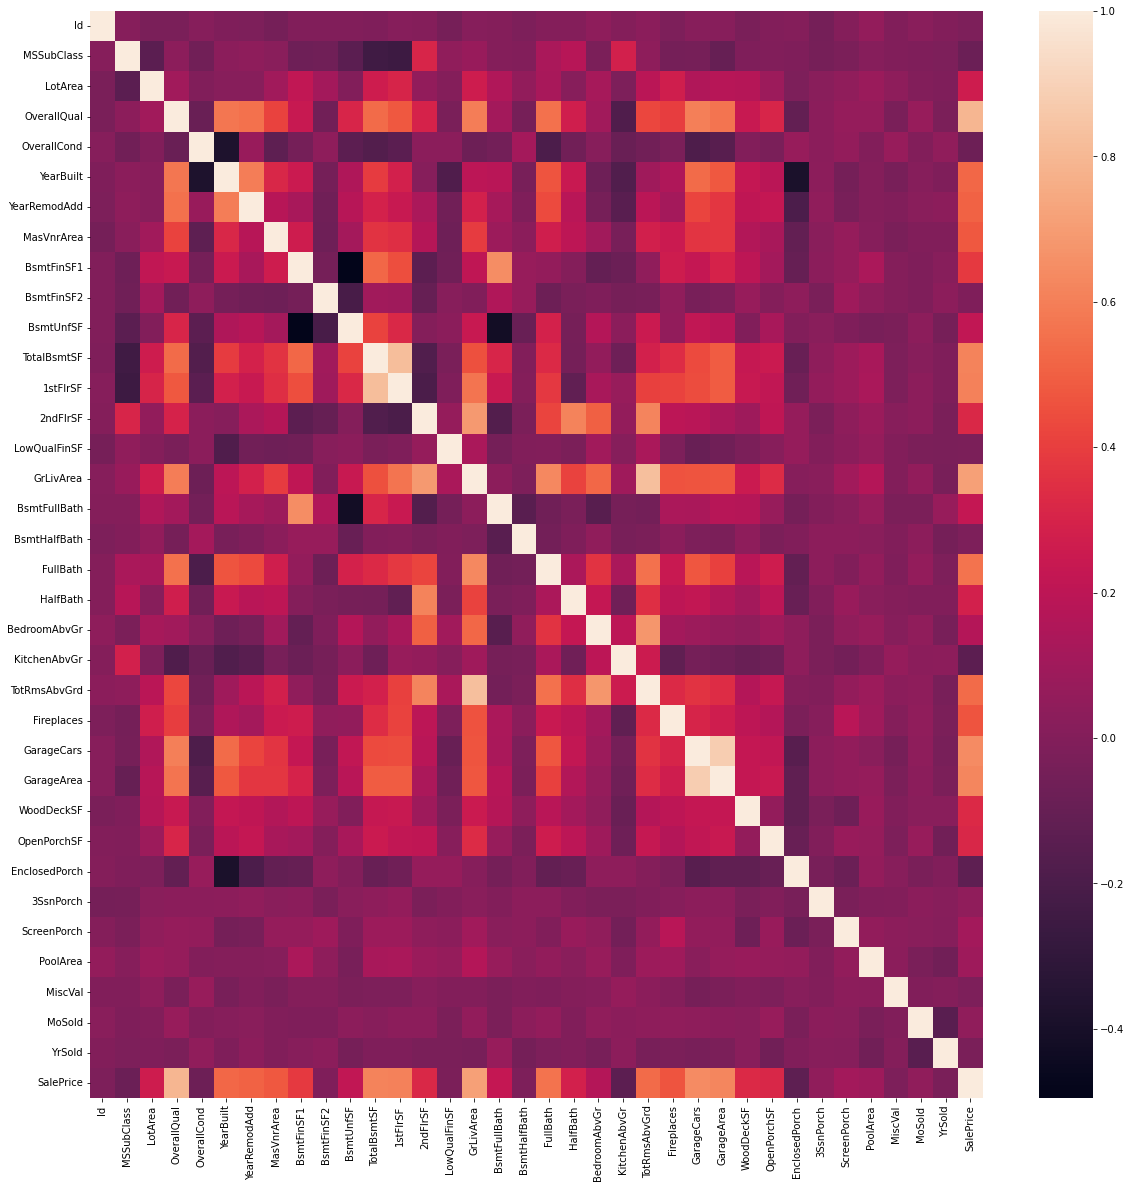

In [51]:
# plt.colormaps
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,annot=False)

**Creating a heatmap of top features correlation in train data.**

<AxesSubplot:>

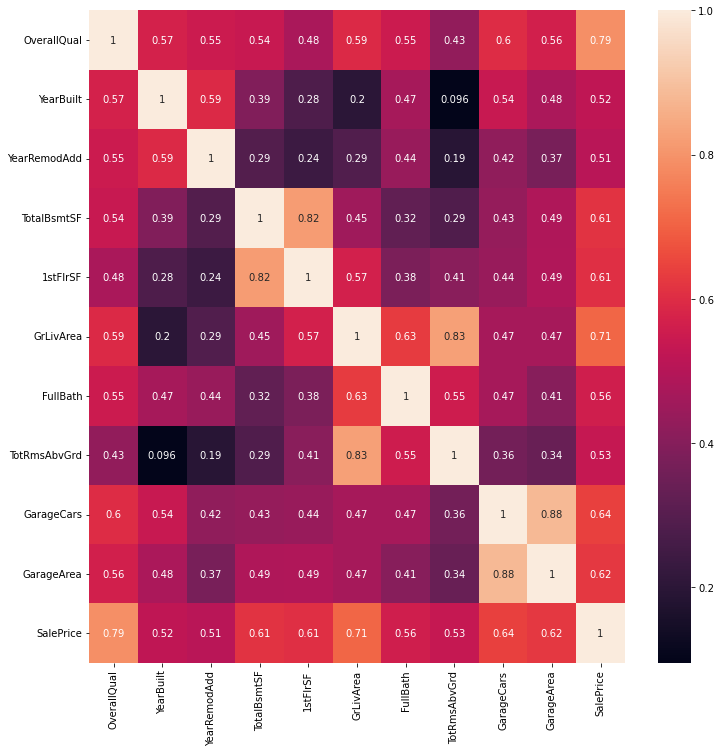

In [52]:
plt.subplots(figsize=(12,12))
sns.heatmap(train[top_features_0_5].corr(),annot=True)

**Visualizing pairwise relationships of top features using a pair plot.**

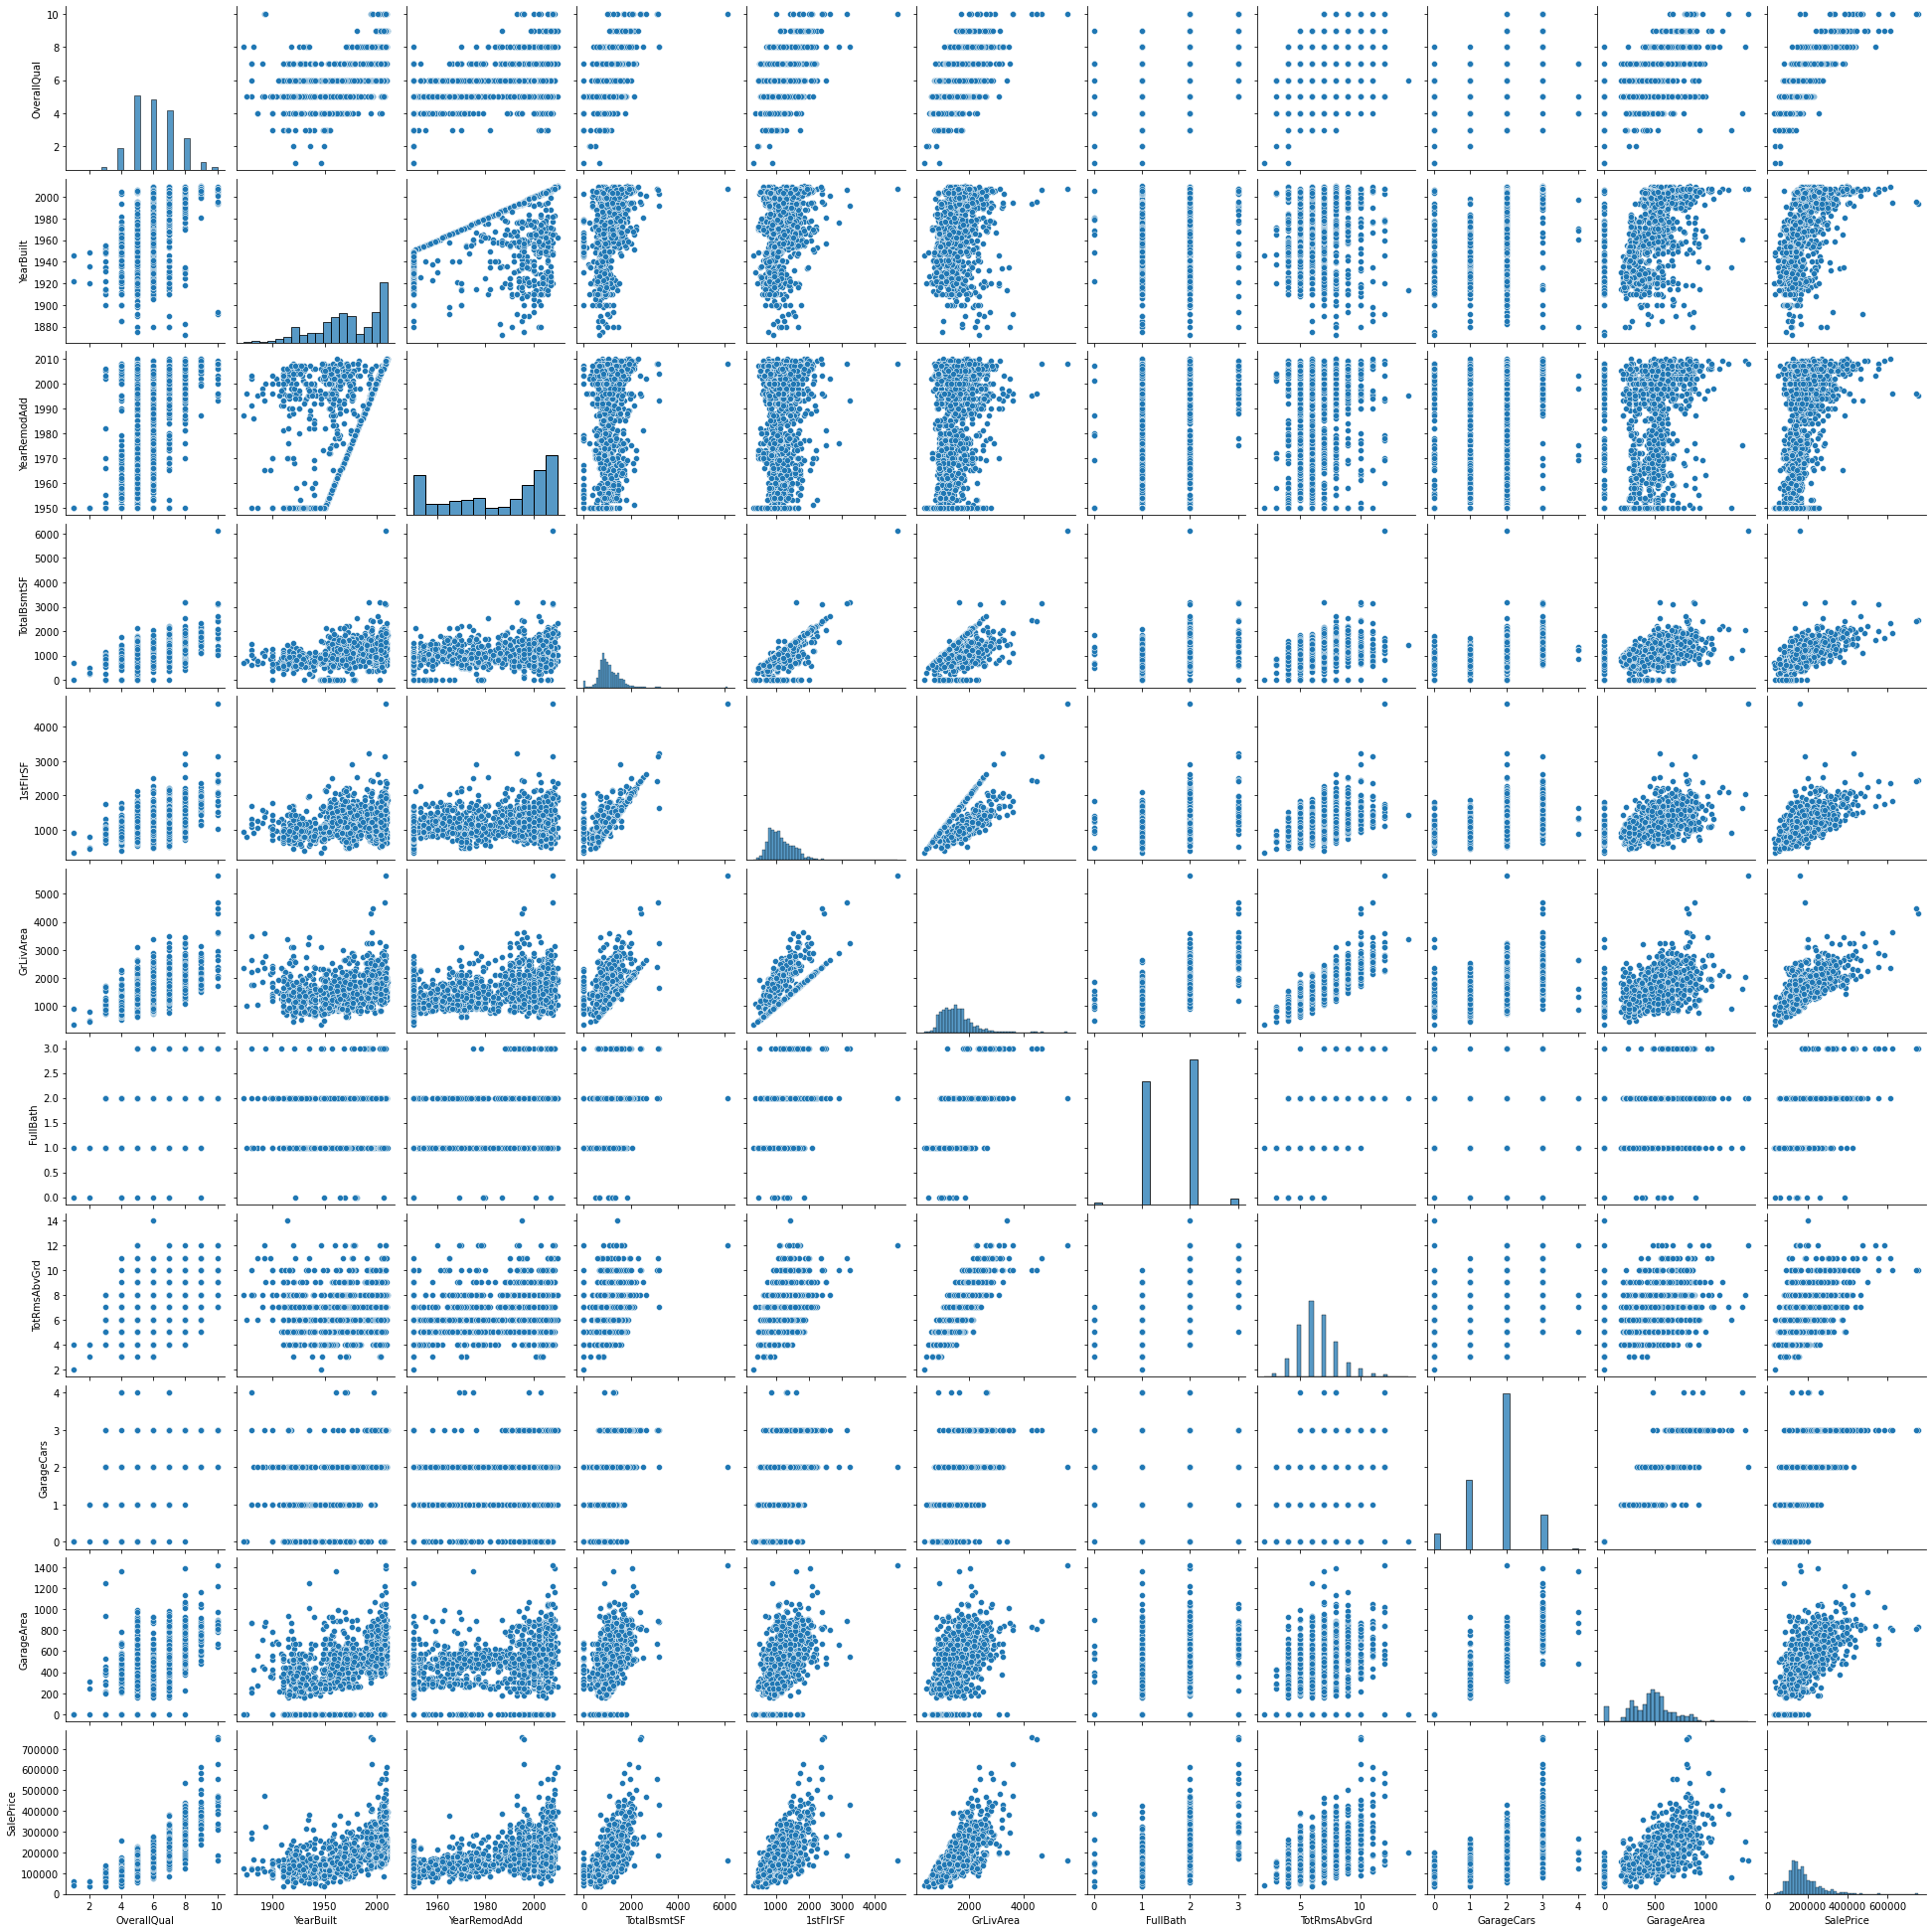

In [53]:
# sns.set()
cols = top_features_0_5
sns.pairplot(train[cols], height = 2.5)
# plt.show();

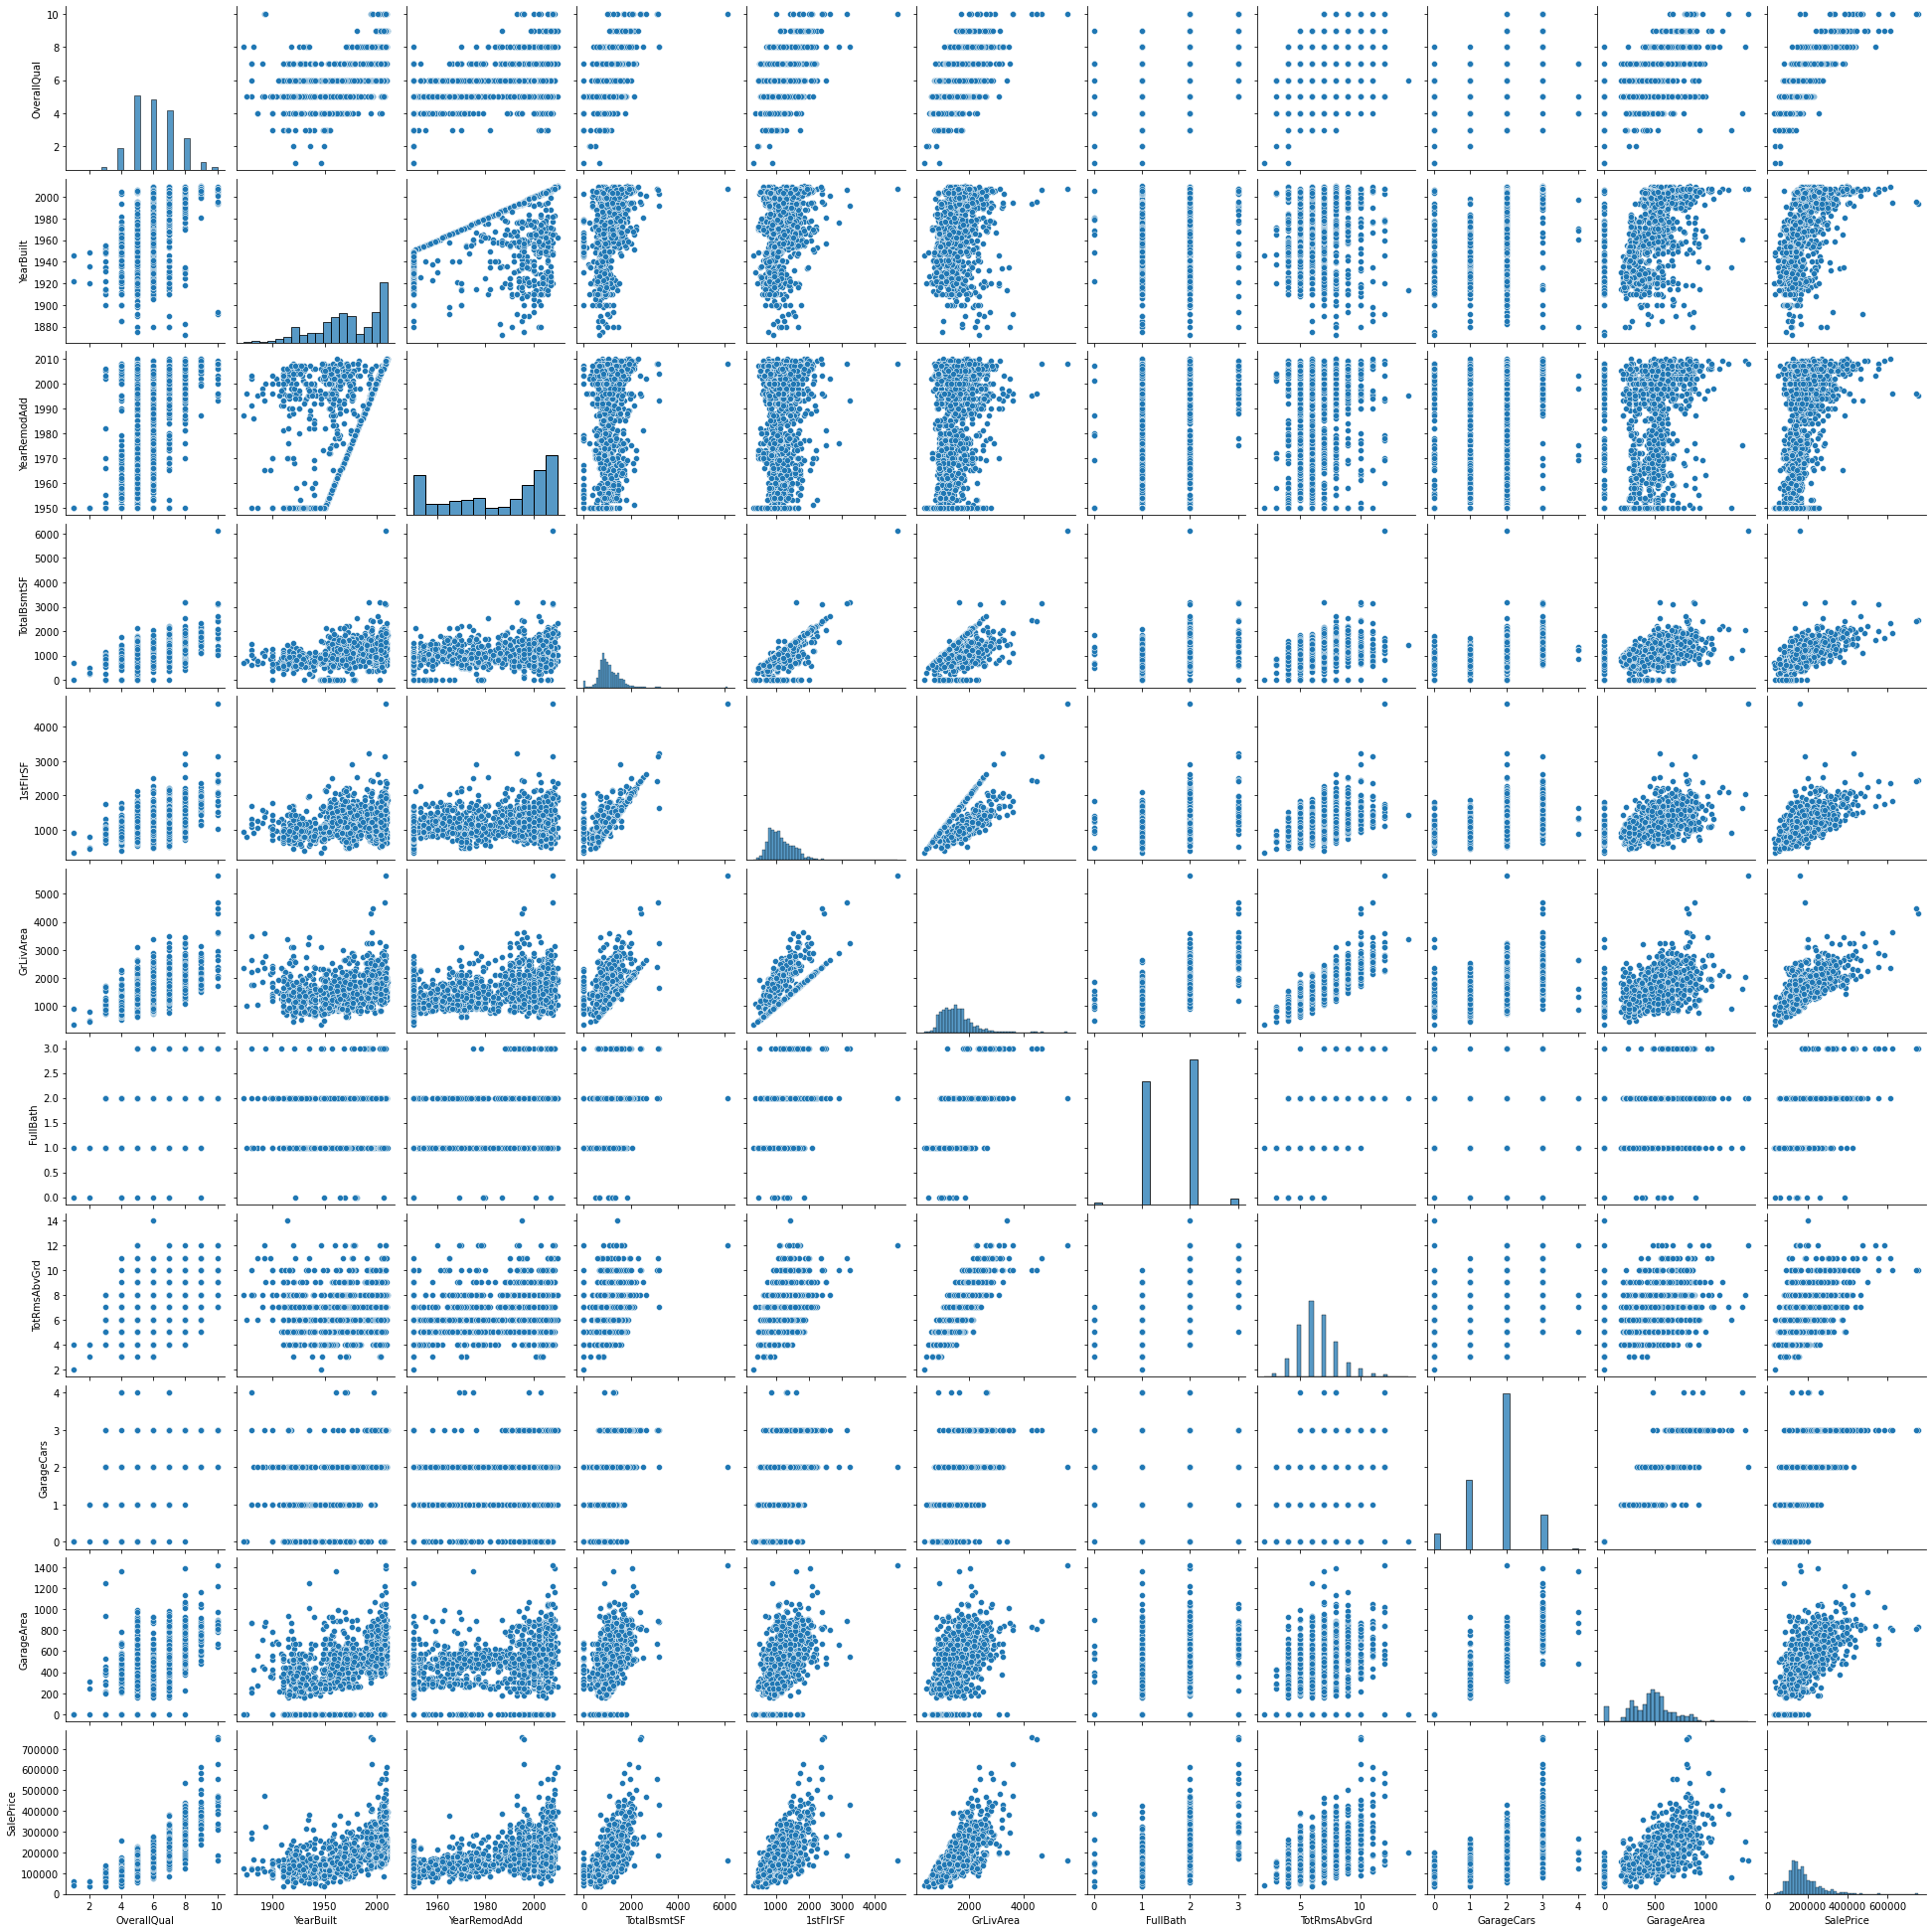

In [54]:
cols = top_features_0_5
sns.pairplot(train[cols])

**Verifying Skewness in the Dataset**

In [55]:
num_cols = train._get_numeric_data().columns
num_cols

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [56]:
train[num_cols]

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
...    ...         ...      ...          ...          ...        ...   
1455  1456          60     7917            6            5       1999   
1456  1457          20    13175            6            6       1978   
1457  1458          70     9042            7            9       1941   
1458  1459          20     9717            5            6       1950   
1459  1460          20     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0             2003       196.0       706.0         0.0  ...           0   
1             1976         0.0       978.0         0.0  ...         298   
2             2002       162.0       486.0         0.0  ...           0   
3             1970         0.0       216.0         0.0  ...           0   
4             2000       350.0       655.0         0.0  ...         192   
...            ...         ...         ...         ...  ...         ...   
1455          2000         0.0         0.0         0.0  ...           0   
1456          1988       119.0       790.0       163.0  ...         349   
1457          2006         0.0       275.0         0.0  ...           0   
1458          1996         0.0        49.0      1029.0  ...         366   
1459          1965         0.0       830.0       290.0  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008   208500.0  
1          5    2007   181500.0  
2          9    2008   223500.0  
3          2    2006   140000.0  
4         12    2008   250000.0  
...      ...     ...        ...  
1455       8    2007   175000.0  
1456       2    2010   210000.0  
1457       5    2010   266500.0  
1458       4    2010   142125.0  
1459       6    2008   147500.0  

[1460 rows x 36 columns]

In [57]:
colms = train.columns
type(colms)

pandas.core.indexes.base.Index

In [58]:
cat = list(set(colms) - set(num_cols))

In [59]:
train_num = train[num_cols]
train_cat = train[cat]

**Calculating skewness for numerical features using lambda function.**

In [60]:
skewness = train_num.apply(lambda x: skew(x))

**Filtering features with skewness greater than 0.5**

In [61]:
skewness = skewness[abs(skewness)>0.5]

**Retrieving the index of features with high skewness.**

In [62]:
skewness.index

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

In [63]:
train_num

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
...    ...         ...      ...          ...          ...        ...   
1455  1456          60     7917            6            5       1999   
1456  1457          20    13175            6            6       1978   
1457  1458          70     9042            7            9       1941   
1458  1459          20     9717            5            6       1950   
1459  1460          20     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0             2003       196.0       706.0         0.0  ...           0   
1             1976         0.0       978.0         0.0  ...         298   
2             2002       162.0       486.0         0.0  ...           0   
3             1970         0.0       216.0         0.0  ...           0   
4             2000       350.0       655.0         0.0  ...         192   
...            ...         ...         ...         ...  ...         ...   
1455          2000         0.0         0.0         0.0  ...           0   
1456          1988       119.0       790.0       163.0  ...         349   
1457          2006         0.0       275.0         0.0  ...           0   
1458          1996         0.0        49.0      1029.0  ...         366   
1459          1965         0.0       830.0       290.0  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008   208500.0  
1          5    2007   181500.0  
2          9    2008   223500.0  
3          2    2006   140000.0  
4         12    2008   250000.0  
...      ...     ...        ...  
1455       8    2007   175000.0  
1456       2    2010   210000.0  
1457       5    2010   266500.0  
1458       4    2010   142125.0  
1459       6    2008   147500.0  

[1460 rows x 36 columns]

In [64]:
train_num[skewness.index] = np.log1p(train_num[skewness.index])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7036\800139593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num[skewness.index] = np.log1p(train_num[skewness.index])


In [65]:
train_num[skewness.index]

MSSubClass   LotArea  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0       4.110874  9.042040     1.791759   7.602900      7.602900    5.283204   
1       3.044522  9.169623     2.197225   7.589336      7.589336    0.000000   
2       4.110874  9.328212     1.791759   7.601902      7.602401    5.093750   
3       4.262680  9.164401     1.791759   7.557995      7.586296    0.000000   
4       4.110874  9.565284     1.791759   7.601402      7.601402    5.860786   
...          ...       ...          ...        ...           ...         ...   
1455    4.110874  8.976894     1.791759   7.600902      7.601402    0.000000   
1456    3.044522  9.486152     1.945910   7.590347      7.595387    4.787492   
1457    4.262680  9.109746     2.302585   7.571474      7.604396    0.000000   
1458    3.044522  9.181735     1.945910   7.576097      7.599401    0.000000   
1459    3.044522  9.204121     1.945910   7.583756      7.583756    0.000000   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  TotRmsAbvGrd  \
0       6.561031    0.000000   5.017280     6.753438  ...      2.197225   
1       6.886532    0.000000   5.652489     7.141245  ...      1.945910   
2       6.188264    0.000000   6.075346     6.825460  ...      1.945910   
3       5.379897    0.000000   6.293419     6.629363  ...      2.079442   
4       6.486161    0.000000   6.196444     7.044033  ...      2.302585   
...          ...         ...        ...          ...  ...           ...   
1455    0.000000    0.000000   6.860664     6.860664  ...      2.079442   
1456    6.673298    5.099866   6.380123     7.341484  ...      2.079442   
1457    5.620401    0.000000   6.777647     7.050123  ...      2.302585   
1458    3.912023    6.937314   0.000000     6.983790  ...      1.791759   
1459    6.722630    5.673323   4.919981     7.136483  ...      1.945910   

      Fireplaces  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0       0.000000    0.000000     4.127134       0.000000        0.0   
1       0.693147    5.700444     0.000000       0.000000        0.0   
2       0.693147    0.000000     3.761200       0.000000        0.0   
3       0.693147    0.000000     3.583519       5.609472        0.0   
4       0.693147    5.262690     4.442651       0.000000        0.0   
...          ...         ...          ...            ...        ...   
1455    0.693147    0.000000     3.713572       0.000000        0.0   
1456    1.098612    5.857933     0.000000       0.000000        0.0   
1457    1.098612    0.000000     4.110874       0.000000        0.0   
1458    0.000000    5.905362     0.000000       4.727388        0.0   
1459    0.000000    6.602588     4.234107       0.000000        0.0   

      ScreenPorch  PoolArea   MiscVal  SalePrice  
0             0.0       0.0  0.000000  12.247699  
1             0.0       0.0  0.000000  12.109016  
2             0.0       0.0  0.000000  12.317171  
3             0.0       0.0  0.000000  11.849405  
4             0.0       0.0  0.000000  12.429220  
...           ...       ...       ...        ...  
1455          0.0       0.0  0.000000  12.072547  
1456          0.0       0.0  0.000000  12.254868  
1457          0.0       0.0  7.824446  12.493133  
1458          0.0       0.0  0.000000  11.864469  
1459          0.0       0.0  0.000000  11.901590  

[1460 rows x 28 columns]

In [66]:
train_cat = pd.get_dummies(train_cat)

In [67]:
train_prep = pd.concat([train_cat,train_num],axis=1) #train_data_prep(prepared)

In [68]:
print(type(train_prep))

<class 'pandas.core.frame.DataFrame'>


In [69]:
train_prep

Utilities_AllPub  Utilities_NoSeWa  LotShape_IR1  LotShape_IR2  \
0                    1                 0             0             0   
1                    1                 0             0             0   
2                    1                 0             1             0   
3                    1                 0             1             0   
4                    1                 0             1             0   
...                ...               ...           ...           ...   
1455                 1                 0             0             0   
1456                 1                 0             0             0   
1457                 1                 0             0             0   
1458                 1                 0             0             0   
1459                 1                 0             0             0   

      LotShape_IR3  LotShape_Reg  PavedDrive_N  PavedDrive_P  PavedDrive_Y  \
0                0             1             0             0             1   
1                0             1             0             0             1   
2                0             0             0             0             1   
3                0             0             0             0             1   
4                0             0             0             0             1   
...            ...           ...           ...           ...           ...   
1455             0             1             0             0             1   
1456             0             1             0             0             1   
1457             0             1             0             0             1   
1458             0             1             0             0             1   
1459             0             1             0             0             1   

      HeatingQC_Ex  ...  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0                1  ...    0.000000     4.127134       0.000000        0.0   
1                1  ...    5.700444     0.000000       0.000000        0.0   
2                1  ...    0.000000     3.761200       0.000000        0.0   
3                0  ...    0.000000     3.583519       5.609472        0.0   
4                1  ...    5.262690     4.442651       0.000000        0.0   
...            ...  ...         ...          ...            ...        ...   
1455             1  ...    0.000000     3.713572       0.000000        0.0   
1456             0  ...    5.857933     0.000000       0.000000        0.0   
1457             1  ...    0.000000     4.110874       0.000000        0.0   
1458             0  ...    5.905362     0.000000       4.727388        0.0   
1459             0  ...    6.602588     4.234107       0.000000        0.0   

      ScreenPorch  PoolArea   MiscVal  MoSold  YrSold  SalePrice  
0             0.0       0.0  0.000000       2    2008  12.247699  
1             0.0       0.0  0.000000       5    2007  12.109016  
2             0.0       0.0  0.000000       9    2008  12.317171  
3             0.0       0.0  0.000000       2    2006  11.849405  
4             0.0       0.0  0.000000      12    2008  12.429220  
...           ...       ...       ...     ...     ...        ...  
1455          0.0       0.0  0.000000       8    2007  12.072547  
1456          0.0       0.0  0.000000       2    2010  12.254868  
1457          0.0       0.0  7.824446       5    2010  12.493133  
1458          0.0       0.0  0.000000       4    2010  11.864469  
1459          0.0       0.0  0.000000       6    2008  11.901590  

[1460 rows x 219 columns]

**Adjusting the Skewness of the Test Dataset No**

In [70]:
test_num = test._get_numeric_data().columns

testcolms = test.columns

catest = list(set(testcolms) - set(test_num))
test_cat = test[catest]
test_num = test[test_num]

In [71]:
type(test_cat)

pandas.core.frame.DataFrame

In [72]:
test_num.shape

(1459, 35)

In [73]:
test_num

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
1460  1461          20    11622            5            6       1961   
1461  1462          20    14267            6            6       1958   
1462  1463          60    13830            5            5       1997   
1463  1464          60     9978            6            6       1998   
1464  1465         120     5005            8            5       1992   
...    ...         ...      ...          ...          ...        ...   
2914  2915         160     1936            4            7       1970   
2915  2916         160     1894            4            5       1970   
2916  2917          20    20000            5            7       1960   
2917  2918          85    10441            5            5       1992   
2918  2919          60     9627            7            5       1993   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
1460          1961         0.0       468.0       144.0  ...       730.0   
1461          1958       108.0       923.0         0.0  ...       312.0   
1462          1998         0.0       791.0         0.0  ...       482.0   
1463          1998        20.0       602.0         0.0  ...       470.0   
1464          1992         0.0       263.0         0.0  ...       506.0   
...            ...         ...         ...         ...  ...         ...   
2914          1970         0.0         0.0         0.0  ...         0.0   
2915          1970         0.0       252.0         0.0  ...       286.0   
2916          1996         0.0      1224.0         0.0  ...       576.0   
2917          1992         0.0       337.0         0.0  ...         0.0   
2918          1994        94.0       758.0         0.0  ...       650.0   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1460         140            0              0          0          120   
1461         393           36              0          0            0   
1462         212           34              0          0            0   
1463         360           36              0          0            0   
1464           0           82              0          0          144   
...          ...          ...            ...        ...          ...   
2914           0            0              0          0            0   
2915           0           24              0          0            0   
2916         474            0              0          0            0   
2917          80           32              0          0            0   
2918         190           48              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold  
1460         0        0       6    2010  
1461         0    12500       6    2010  
1462         0        0       3    2010  
1463         0        0       6    2010  
1464         0        0       1    2010  
...        ...      ...     ...     ...  
2914         0        0       6    2006  
2915         0        0       4    2006  
2916         0        0       9    2006  
2917         0      700       7    2006  
2918         0        0      11    2006  

[1459 rows x 35 columns]

**Now Evaluating the Skewness of the Dataset**

In [74]:
skewness = test_num.apply(lambda x:skew(x))

In [75]:
skewness = skewness[abs(skewness)>0.5]

In [76]:
skewness.sort_values(ascending=False)

PoolArea         20.176117
MiscVal          20.054543
LowQualFinSF     16.150628
3SsnPorch        12.511336
EnclosedPorch     4.664371
KitchenAbvGr      4.074860
BsmtFinSF2        4.038796
ScreenPorch       3.784349
BsmtHalfBath      3.779085
LotArea           3.112013
OpenPorchSF       2.685015
MasVnrArea        2.543324
WoodDeckSF        2.128569
1stFlrSF          1.556592
MSSubClass        1.345305
BsmtFinSF1        1.165130
GrLivArea         1.129240
BsmtUnfSF         0.918977
2ndFlrSF          0.911944
TotRmsAbvGrd      0.841731
Fireplaces        0.819015
TotalBsmtSF       0.804238
HalfBath          0.713993
BsmtFullBath      0.651195
YearBuilt        -0.587052
dtype: float64

In [77]:
test_num[skewness.index] = np.log1p(test_num[skewness.index])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7036\803172079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_num[skewness.index] = np.log1p(test_num[skewness.index])


In [78]:
test_num[skewness.index]

MSSubClass   LotArea  YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
1460    3.044522  9.360741   7.581720    0.000000    6.150603    4.976734   
1461    3.044522  9.565775   7.580189    4.691348    6.828712    0.000000   
1462    4.110874  9.534668   7.599902    0.000000    6.674561    0.000000   
1463    4.110874  9.208238   7.600402    3.044522    6.401917    0.000000   
1464    4.795791  8.518392   7.597396    0.000000    5.575949    0.000000   
...          ...       ...        ...         ...         ...         ...   
2914    5.081404  7.568896   7.586296    0.000000    0.000000    0.000000   
2915    5.081404  7.546974   7.586296    0.000000    5.533389    0.000000   
2916    3.044522  9.903538   7.581210    0.000000    7.110696    0.000000   
2917    4.454347  9.253591   7.597396    0.000000    5.823046    0.000000   
2918    4.110874  9.172431   7.597898    4.553877    6.632002    0.000000   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  KitchenAbvGr  \
1460   5.602119     6.783325  6.799056  0.000000  ...      0.693147   
1461   6.008813     7.192934  7.192934  0.000000  ...      0.693147   
1462   4.927254     6.834109  6.834109  6.553933  ...      0.693147   
1463   5.783825     6.831954  6.831954  6.520621  ...      0.693147   
1464   6.925595     7.155396  7.155396  0.000000  ...      0.693147   
...         ...          ...       ...       ...  ...           ...   
2914   6.304449     6.304449  6.304449  6.304449  ...      0.693147   
2915   5.686975     6.304449  6.304449  6.304449  ...      0.693147   
2916   0.000000     7.110696  7.110696  0.000000  ...      0.693147   
2917   6.356108     6.816736  6.878326  0.000000  ...      0.693147   
2918   5.476464     6.904751  6.904751  6.912743  ...      0.693147   

      TotRmsAbvGrd  Fireplaces  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
1460      1.791759    0.000000    4.948760     0.000000            0.0   
1461      1.945910    0.000000    5.976351     3.610918            0.0   
1462      1.945910    0.693147    5.361292     3.555348            0.0   
1463      2.079442    0.693147    5.888878     3.610918            0.0   
1464      1.791759    0.000000    0.000000     4.418841            0.0   
...            ...         ...         ...          ...            ...   
2914      1.791759    0.000000    0.000000     0.000000            0.0   
2915      1.945910    0.000000    0.000000     3.218876            0.0   
2916      2.079442    0.693147    6.163315     0.000000            0.0   
2917      1.945910    0.000000    4.394449     3.496508            0.0   
2918      2.302585    0.693147    5.252273     3.891820            0.0   

      3SsnPorch  ScreenPorch  PoolArea   MiscVal  
1460        0.0     4.795791       0.0  0.000000  
1461        0.0     0.000000       0.0  9.433564  
1462        0.0     0.000000       0.0  0.000000  
1463        0.0     0.000000       0.0  0.000000  
1464        0.0     4.976734       0.0  0.000000  
...         ...          ...       ...       ...  
2914        0.0     0.000000       0.0  0.000000  
2915        0.0     0.000000       0.0  0.000000  
2916        0.0     0.000000       0.0  0.000000  
2917        0.0     0.000000       0.0  6.552508  
2918        0.0     0.000000       0.0  0.000000  

[1459 rows x 25 columns]

In [79]:
test_cat = pd.get_dummies(test_cat)

**Combining numerical and categorical features for test data preparation.**

In [80]:
test_prep = pd.concat([test_num,test_cat],axis=1) #test_data_prep(prepared)

In [81]:
test_prep

Id  MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  \
1460  1461    3.044522  9.360741            5            6   7.581720   
1461  1462    3.044522  9.565775            6            6   7.580189   
1462  1463    4.110874  9.534668            5            5   7.599902   
1463  1464    4.110874  9.208238            6            6   7.600402   
1464  1465    4.795791  8.518392            8            5   7.597396   
...    ...         ...       ...          ...          ...        ...   
2914  2915    5.081404  7.568896            4            7   7.586296   
2915  2916    5.081404  7.546974            4            5   7.586296   
2916  2917    3.044522  9.903538            5            7   7.581210   
2917  2918    4.454347  9.253591            5            5   7.597396   
2918  2919    4.110874  9.172431            7            5   7.597898   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  \
1460          1961    0.000000    6.150603    4.976734  ...   
1461          1958    4.691348    6.828712    0.000000  ...   
1462          1998    0.000000    6.674561    0.000000  ...   
1463          1998    3.044522    6.401917    0.000000  ...   
1464          1992    0.000000    5.575949    0.000000  ...   
...            ...         ...         ...         ...  ...   
2914          1970    0.000000    0.000000    0.000000  ...   
2915          1970    0.000000    5.533389    0.000000  ...   
2916          1996    0.000000    7.110696    0.000000  ...   
2917          1992    0.000000    5.823046    0.000000  ...   
2918          1994    4.553877    6.632002    0.000000  ...   

      Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
1460                    0                     0                     0   
1461                    0                     0                     0   
1462                    0                     0                     0   
1463                    0                     0                     0   
1464                    0                     0                     0   
...                   ...                   ...                   ...   
2914                    0                     0                     0   
2915                    0                     0                     0   
2916                    0                     0                     0   
2917                    0                     0                     0   
2918                    0                     0                     0   

      Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  \
1460                     0                    0                     0   
1461                     0                    0                     0   
1462                     0                    0                     0   
1463                     0                    0                     0   
1464                     1                    0                     0   
...                    ...                  ...                   ...   
2914                     0                    0                     0   
2915                     0                    0                     0   
2916                     0                    0                     0   
2917                     0                    0                     0   
2918                     0                    0                     0   

      KitchenQual_Ex  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  
1460               0               0               0               1  
1461               0               0               1               0  
1462               0               0               0               1  
1463               0               0               1               0  
1464               0               0               1               0  
...              ...             ...             ...             ...  
2914               0               0               0               1  
2915               0               0               0

In [82]:
test_prep.shape,train_prep.shape

((1459, 207), (1460, 219))

In [83]:
test_prep.isna().sum().sum(),train_prep.isna().sum().sum()

(0, 0)

In [84]:
test_prep.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA'],
      dtype='object', length=207)

**Compute correlation matrix, select features with > 0.5 correlation with "SalePrice" and plot their heatmap.**

<AxesSubplot:>

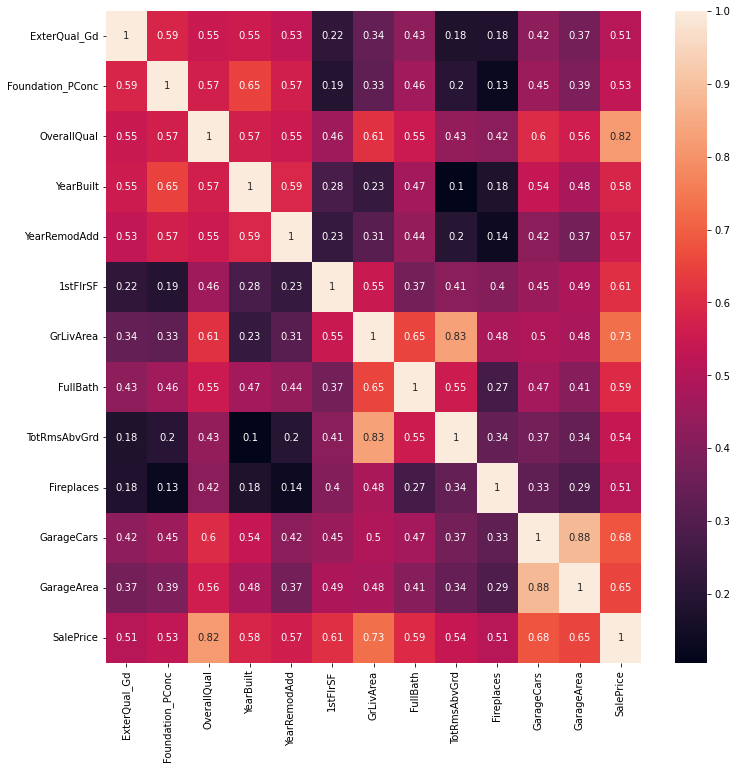

In [85]:
corrmat = train_prep.corr()
top_features_0_5 = corrmat.index[(corrmat["SalePrice"])>0.5]
plt.subplots(figsize=(12,12))
sns.heatmap(train_prep[top_features_0_5].corr(),annot=True)

**now we have more features which are correlating with Target vatriable**


**some are dropped also as our data is in proper form now it was not before**

In [86]:
corr_feats = train_prep[top_features_0_5]
corr_feats

ExterQual_Gd  Foundation_PConc  OverallQual  YearBuilt  YearRemodAdd  \
0                1                 1            7   7.602900      7.602900   
1                0                 0            6   7.589336      7.589336   
2                1                 1            7   7.601902      7.602401   
3                0                 0            7   7.557995      7.586296   
4                1                 1            8   7.601402      7.601402   
...            ...               ...          ...        ...           ...   
1455             0                 1            6   7.600902      7.601402   
1456             0                 0            6   7.590347      7.595387   
1457             0                 0            7   7.571474      7.604396   
1458             0                 0            5   7.576097      7.599401   
1459             1                 0            5   7.583756      7.583756   

      1stFlrSF  GrLivArea  FullBath  TotRmsAbvGrd  Fireplaces  GarageCars  \
0     6.753438   7.444833         2      2.197225    0.000000         2.0   
1     7.141245   7.141245         2      1.945910    0.693147         2.0   
2     6.825460   7.488294         2      1.945910    0.693147         2.0   
3     6.869014   7.448916         1      2.079442    0.693147         3.0   
4     7.044033   7.695758         2      2.302585    0.693147         3.0   
...        ...        ...       ...           ...         ...         ...   
1455  6.860664   7.407318         2      2.079442    0.693147         2.0   
1456  7.637234   7.637234         2      2.079442    1.098612         2.0   
1457  7.080868   7.758333         2      2.302585    1.098612         1.0   
1458  6.983790   6.983790         1      1.791759    0.000000         1.0   
1459  7.136483   7.136483         1      1.945910    0.000000         1.0   

      GarageArea  SalePrice  
0          548.0  12.247699  
1          460.0  12.109016  
2          608.0  12.317171  
3          642.0  11.849405  
4          836.0  12.429220  
...          ...        ...  
1455       460.0  12.072547  
1456       500.0  12.254868  
1457       252.0  12.493133  
1458       240.0  11.864469  
1459       276.0  11.901590  

[1460 rows x 13 columns]

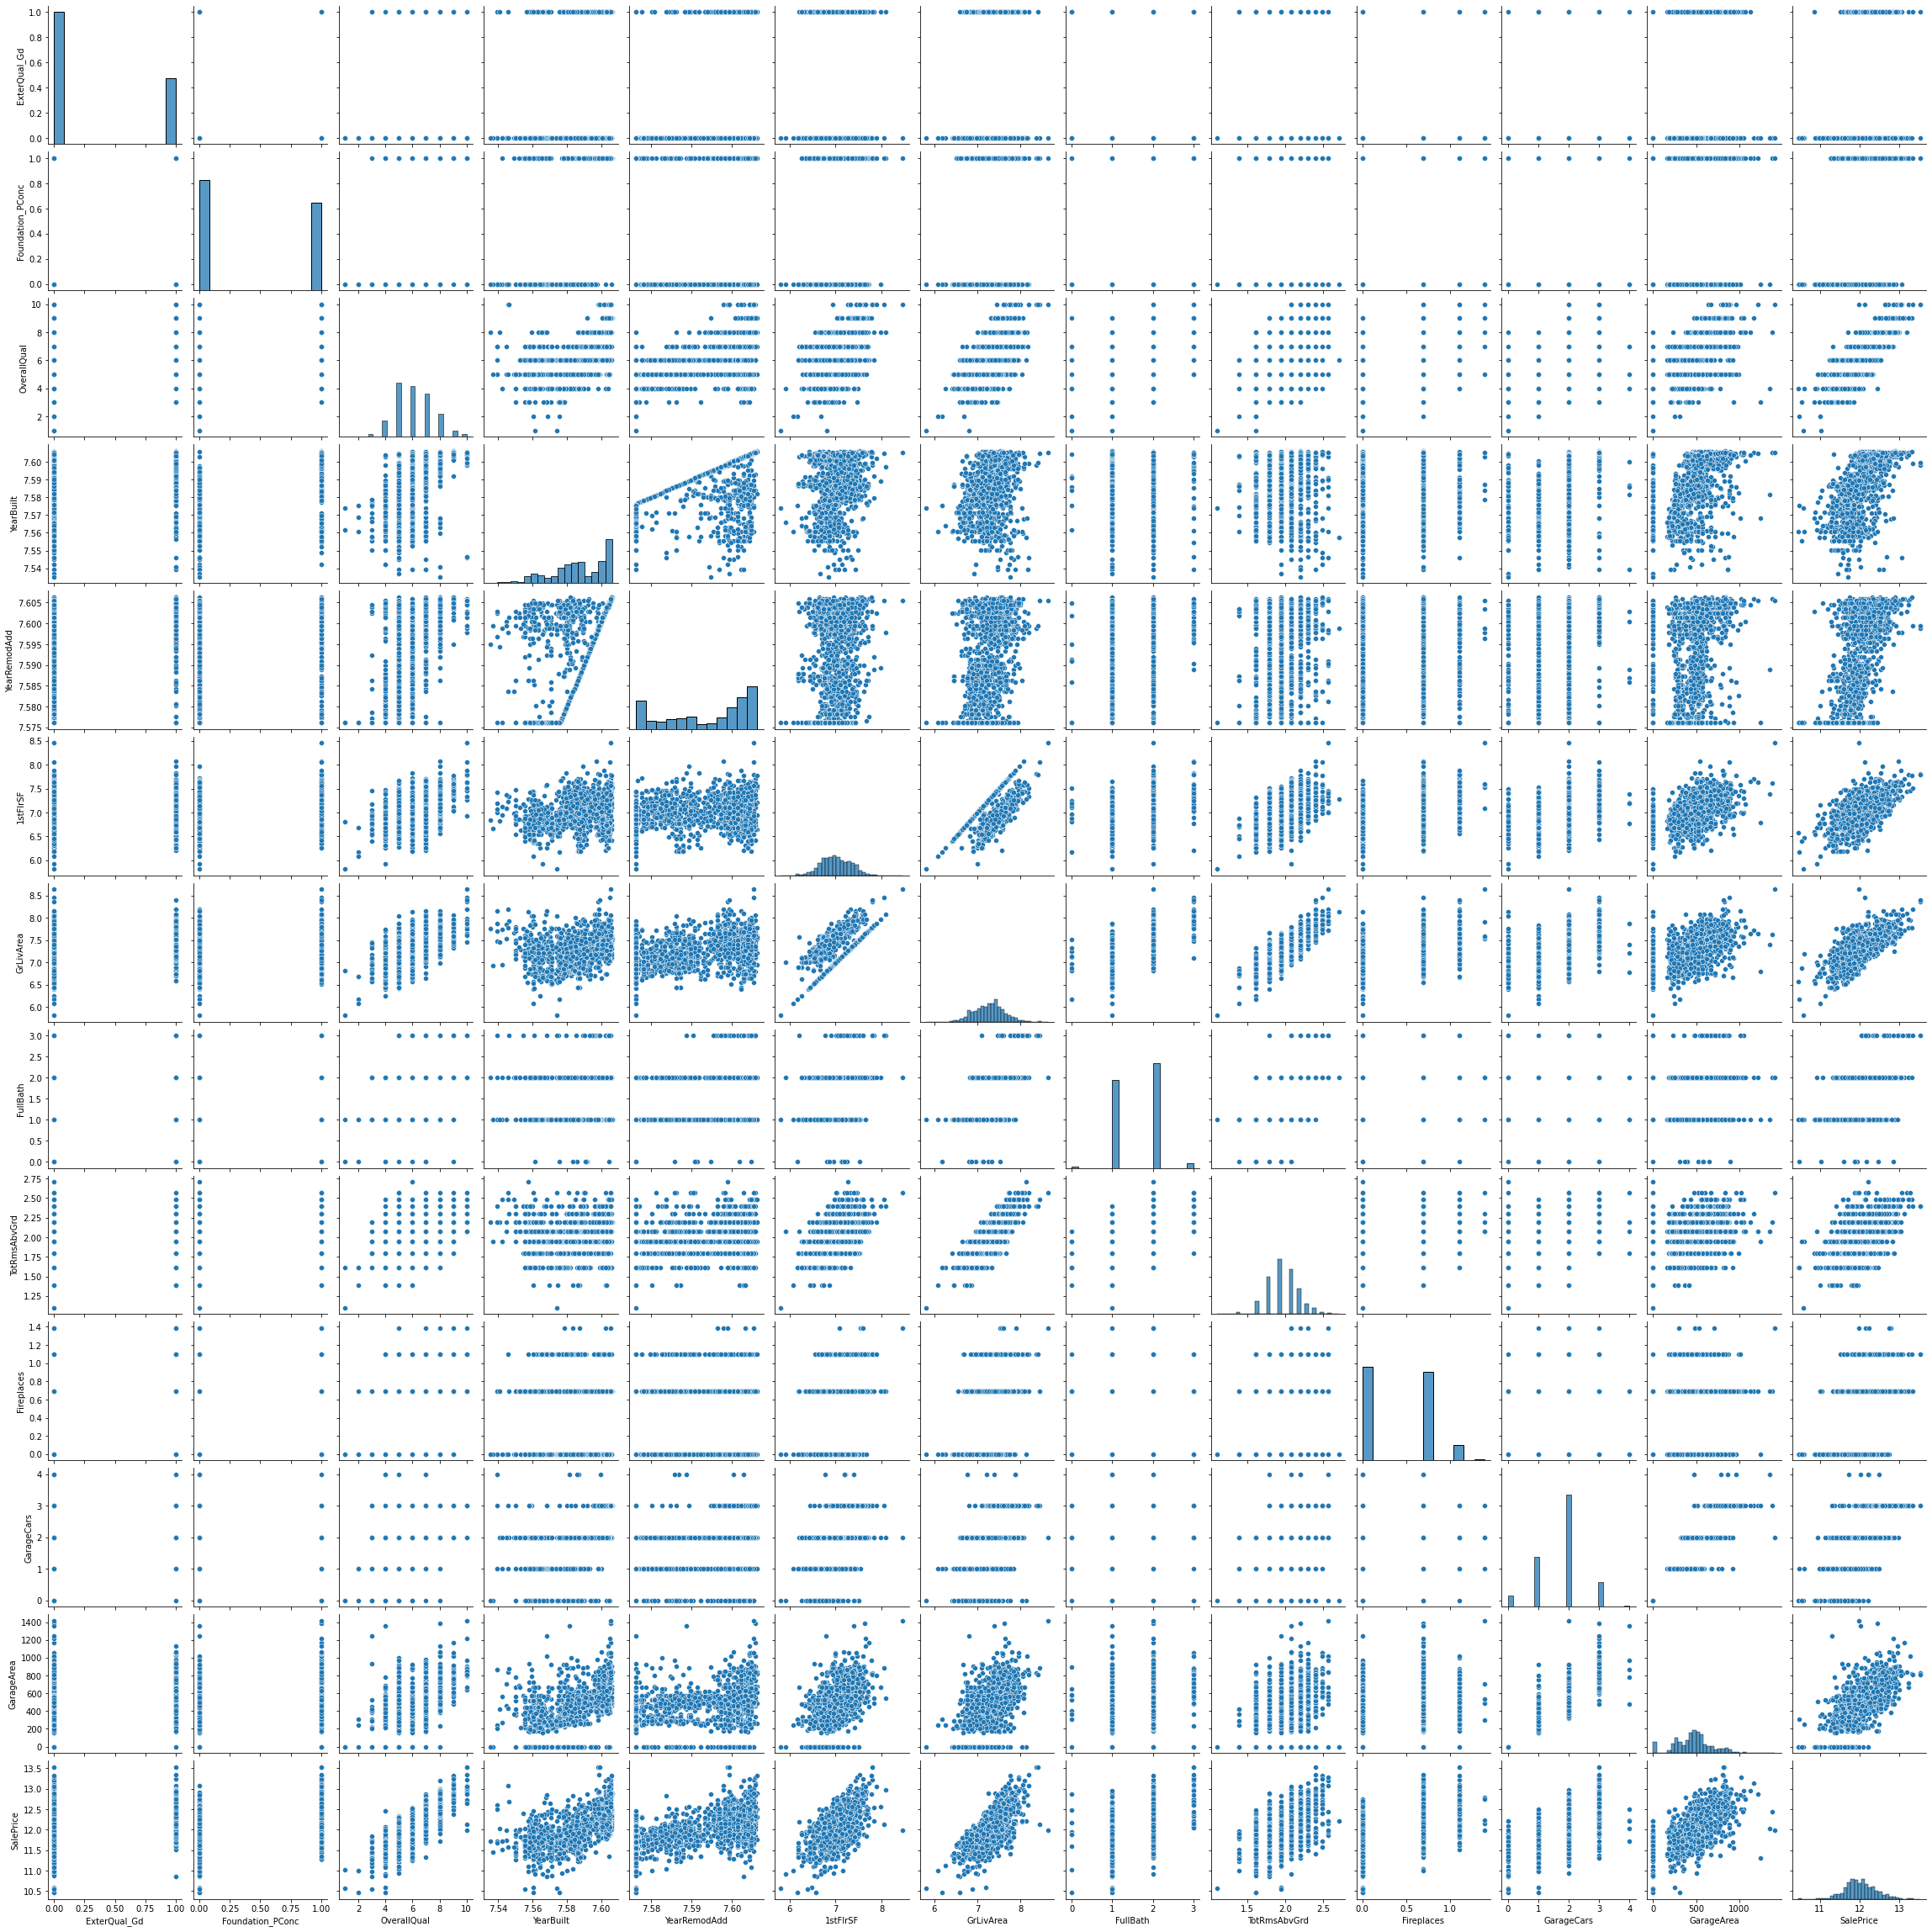

In [87]:
cols = top_features_0_5
sns.pairplot(train_prep[cols])

**Import Linear Regression for modeling.**

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
linearmodel = LinearRegression()

In [90]:
model_tr = train_prep[top_features_0_5]
model_tr.drop("SalePrice",axis=1,inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7036\142406990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_tr.drop("SalePrice",axis=1,inplace=True)


In [91]:
Z = model_tr
X = train_prep["SalePrice"]

In [92]:
linearmodel.fit(Z,X)

LinearRegression()

In [93]:
linearmodel.intercept_,linearmodel.coef_

(-57.88857127447863,
 array([-4.59944440e-03,  9.17843446e-03,  8.93874414e-02,  3.84589946e+00,
         4.77163816e+00,  1.78803437e-01,  3.56904681e-01, -2.50925690e-02,
        -1.38536990e-02,  1.03337545e-01,  3.92380479e-02,  1.29027859e-04]))

In [94]:
train_prep[top_features_0_5]

ExterQual_Gd  Foundation_PConc  OverallQual  YearBuilt  YearRemodAdd  \
0                1                 1            7   7.602900      7.602900   
1                0                 0            6   7.589336      7.589336   
2                1                 1            7   7.601902      7.602401   
3                0                 0            7   7.557995      7.586296   
4                1                 1            8   7.601402      7.601402   
...            ...               ...          ...        ...           ...   
1455             0                 1            6   7.600902      7.601402   
1456             0                 0            6   7.590347      7.595387   
1457             0                 0            7   7.571474      7.604396   
1458             0                 0            5   7.576097      7.599401   
1459             1                 0            5   7.583756      7.583756   

      1stFlrSF  GrLivArea  FullBath  TotRmsAbvGrd  Fireplaces  GarageCars  \
0     6.753438   7.444833         2      2.197225    0.000000         2.0   
1     7.141245   7.141245         2      1.945910    0.693147         2.0   
2     6.825460   7.488294         2      1.945910    0.693147         2.0   
3     6.869014   7.448916         1      2.079442    0.693147         3.0   
4     7.044033   7.695758         2      2.302585    0.693147         3.0   
...        ...        ...       ...           ...         ...         ...   
1455  6.860664   7.407318         2      2.079442    0.693147         2.0   
1456  7.637234   7.637234         2      2.079442    1.098612         2.0   
1457  7.080868   7.758333         2      2.302585    1.098612         1.0   
1458  6.983790   6.983790         1      1.791759    0.000000         1.0   
1459  7.136483   7.136483         1      1.945910    0.000000         1.0   

      GarageArea  SalePrice  
0          548.0  12.247699  
1          460.0  12.109016  
2          608.0  12.317171  
3          642.0  11.849405  
4          836.0  12.429220  
...          ...        ...  
1455       460.0  12.072547  
1456       500.0  12.254868  
1457       252.0  12.493133  
1458       240.0  11.864469  
1459       276.0  11.901590  

[1460 rows x 13 columns]

In [95]:
linearmodel.predict(np.array(  [ [1,1,7,7.6,7.6,6.7,7.44,2,2.19,0,2.0,548.0] ] ))

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.15701825])

**Performing cross-validation on the Linear Regression model using Z and X, then print the mean accuracy.**

In [107]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linearmodel, Z, X)
print("Accuracy of model is : ",np.mean(scores)*100)

Accuracy of model is :  83.28849941423648


**Make a prediction using the Linear Regression model for a specific input.**

In [101]:
linearmodel.predict(np.array(  [ [1,1,7,7.6,7.6,6.7,7.44,2,2.19,0,2.0,548.0] ] ))

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.15701825])

In [103]:
Y_hat = linearmodel.predict(Z)
Y_hat

array([12.1931929 , 12.00707722, 12.29821151, ..., 12.27996064,
       11.7184307 , 11.75294286])

In [106]:
from sklearn.metrics import mean_squared_error
mean_squared_error(train_prep["SalePrice"], Y_hat)

0.0255919726687496

**So I obtained an impressive mean squared error of 0.02559, signifying strong model performance.**